# Lab 1

## Task 1: Image Exploration


### Load and Display the Image

Load the image from the .mat file.

Load and display the .png image

In [71]:
# Install required packages

from scipy.io import loadmat
from scipy.signal import convolve2d
from scipy.ndimage import binary_erosion
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from scipy.ndimage import binary_erosion, binary_dilation, binary_opening, binary_closing
import cv2 as cv 
import scipy.io as sio

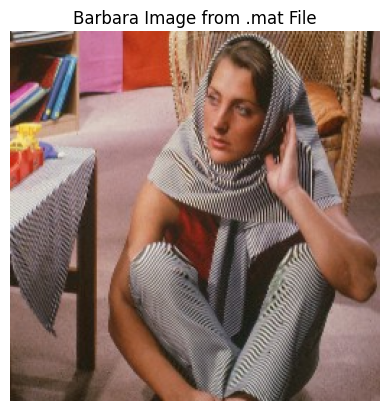

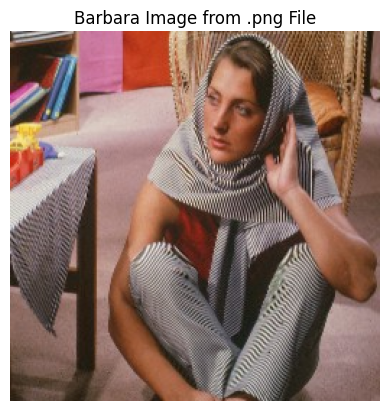

In [6]:
# Load image from .mat file in task1 folder
mat_data = sio.loadmat('task1/barbara.mat')
barbara_mat = mat_data.get('image', next(v for k, v in mat_data.items() if not k.startswith('__')))
plt.imshow(barbara_mat)
plt.title('Barbara Image from .mat File')
plt.axis('off')
plt.show()

# Load and display the .png image from task1 folder
barbara_png = cv.imread('task1/barbara.png')
barbara_png_rgb = cv.cvtColor(barbara_png, cv.COLOR_BGR2RGB)
plt.imshow(barbara_png_rgb)
plt.title('Barbara Image from .png File')
plt.axis('off')
plt.show()

### Image Conversion and Inspection

Convert the image to grayscale.

Check image dimensions and number of channels.

Convert between data types: double ↔ uint8.

color: (256, 256, 3)
uint8
gray: (256, 256)
uint8
Color: dtype=uint8, range=(0.000, 255.000)
Gray: dtype=uint8, range=(10.000, 237.000)

Color: dtype=float64, range=(0.000, 1.000)
Gray: dtype=float64, range=(0.039, 0.929)

Color (back to uint8): dtype=uint8, range=(0, 255)
Gray (back to uint8): dtype=uint8, range=(10, 237)


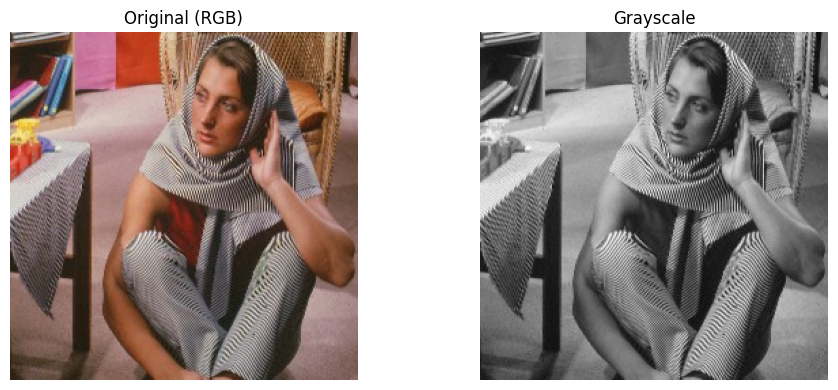

In [18]:
# Load color image (BGR in OpenCV)
img_bgr = cv.imread('task1/barbara.png')

# Convert to grayscale
img_gray = cv.cvtColor(img_bgr, cv.COLOR_BGR2GRAY)

# Inspect dimensions and channels
print(f"color: {img_bgr.shape}")
print(img_bgr.dtype)
print(f"gray: {img_gray.shape}")
print(img_gray.dtype)
print(f"Color: dtype={img_bgr.dtype}, range=({img_bgr.min():.3f}, {img_bgr.max():.3f})")
print(f"Gray: dtype={img_gray.dtype}, range=({img_gray.min():.3f}, {img_gray.max():.3f})\n")

# Convert uint8 -> double (float64 in NumPy), scale to [0,1]
img_bgr_double = img_bgr.astype(np.float64) / 255.0
img_gray_double = img_gray.astype(np.float64) / 255.0
print(f"Color: dtype={img_bgr_double.dtype}, range=({img_bgr_double.min():.3f}, {img_bgr_double.max():.3f})")
print(f"Gray: dtype={img_gray_double.dtype}, range=({img_gray_double.min():.3f}, {img_gray_double.max():.3f})\n")

# Convert double -> uint8, scale back to [0,255]
img_bgr_uint8 = np.clip(img_bgr_double * 255.0, 0, 255).astype(np.uint8)
img_gray_uint8 = np.clip(img_gray_double * 255.0, 0, 255).astype(np.uint8)
print(f"Color (back to uint8): dtype={img_bgr_uint8.dtype}, range=({img_bgr_uint8.min()}, {img_bgr_uint8.max()})")
print(f"Gray (back to uint8): dtype={img_gray_uint8.dtype}, range=({img_gray_uint8.min()}, {img_gray_uint8.max()})")

# Optional visualization
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(img_rgb); plt.title('Original (RGB)'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(img_gray, cmap='gray'); plt.title('Grayscale'); plt.axis('off')
plt.tight_layout(); plt.show()



### Image Resizing

Downscale the image to:

Half the original size

One-quarter the original size

Original size: 256x256
Half size: 128x128
Quarter size: 64x64


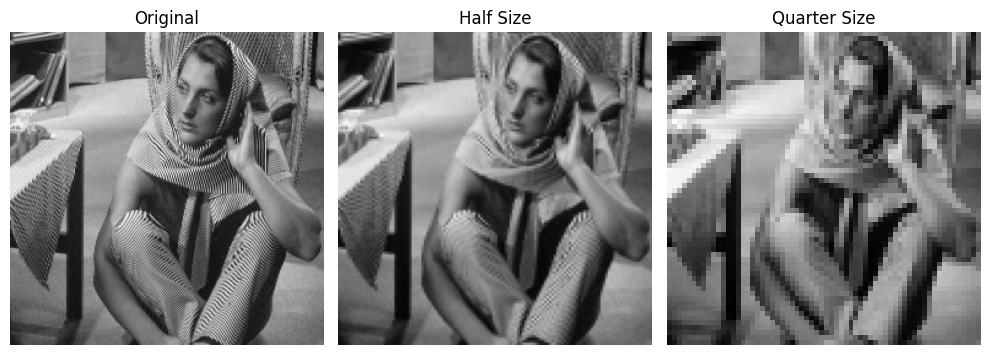

In [19]:
# Get original size
h, w = img_gray.shape
print(f"Original size: {w}x{h}")

# Downscale to half the original size
img_half = cv.resize(img_gray, (w // 2, h // 2), interpolation=cv.INTER_AREA)
print(f"Half size: {img_half.shape[1]}x{img_half.shape[0]}")

# Downscale to one-quarter the original size
img_quarter = cv.resize(img_gray, (w // 4, h // 4), interpolation=cv.INTER_AREA)
print(f"Quarter size: {img_quarter.shape[1]}x{img_quarter.shape[0]}")

# Display results
plt.figure(figsize=(10,4))
plt.subplot(1,3,1); plt.imshow(img_gray, cmap='gray'); plt.title('Original'); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(img_half, cmap='gray'); plt.title('Half Size'); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(img_quarter, cmap='gray'); plt.title('Quarter Size'); plt.axis('off')
plt.tight_layout()
plt.show()

### Brightness and Histogram Analysis

Adjust the image brightness.

Visualize the image histogram before and after adjustment.

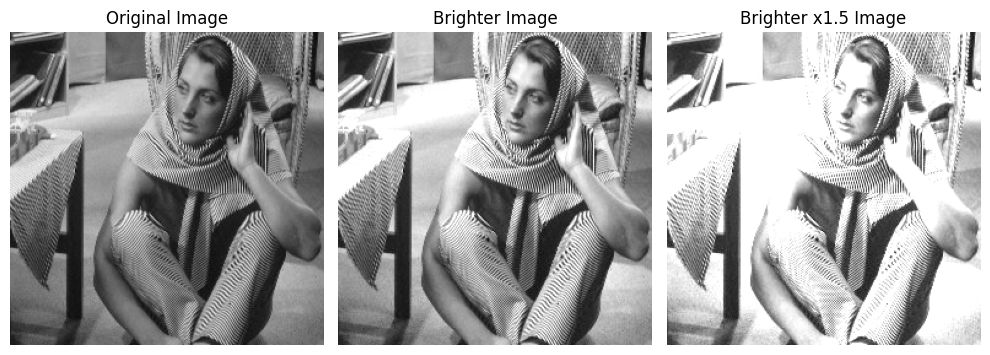

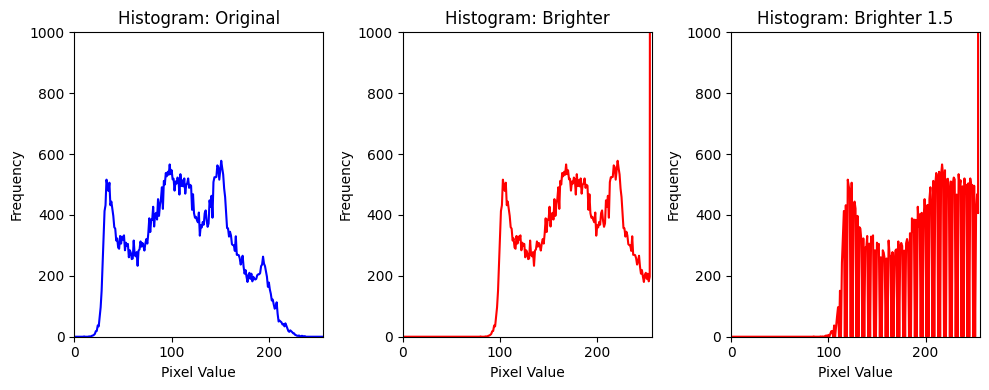

In [34]:
# Adjust brightness (increase by +70)
brightness_value = 70
# new_pixel = img_gray * alpha + beta
# alpha=1 means no change in contrast 

img_brighter = cv.convertScaleAbs(img_gray, alpha=1, beta=brightness_value)
img_brighter_multi = cv.convertScaleAbs(img_gray, alpha=1.5, beta=brightness_value)

# Display original and brightness-adjusted images
plt.figure(figsize=(10,4))
plt.subplot(1,3,1); plt.imshow(img_gray, cmap='gray'); plt.title('Original Image'); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(img_brighter, cmap='gray'); plt.title('Brighter Image'); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(img_brighter_multi, cmap='gray'); plt.title('Brighter x1.5 Image'); plt.axis('off')
plt.tight_layout()
plt.show()

# Compute histograms
hist_original = cv.calcHist([img_gray], [0], None, [256], [0, 256])
hist_brighter = cv.calcHist([img_brighter], [0], None, [256], [0, 256])
hist_brighter_multi = cv.calcHist([img_brighter_multi], [0], None, [256], [0, 256])

# Plot histograms before and after adjustment
plt.figure(figsize=(10,4))
plt.subplot(1,3,1); plt.plot(hist_original, color='blue'); plt.title('Histogram: Original'); plt.xlim([0,256]); plt.ylim([0,1000]);plt.xlabel('Pixel Value'); plt.ylabel('Frequency')
plt.subplot(1,3,2); plt.plot(hist_brighter, color='red'); plt.title('Histogram: Brighter'); plt.xlim([0,256]);plt.ylim([0,1000]); plt.xlabel('Pixel Value'); plt.ylabel('Frequency')
plt.subplot(1,3,3); plt.plot(hist_brighter_multi, color='red'); plt.title('Histogram: Brighter 1.5'); plt.xlim([0,256]);plt.ylim([0,1000]); plt.xlabel('Pixel Value'); plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


The histogram appears wider for the brighter version.

Multiplication increases the difference between pixel values.

For example: 100 and 110 (difference = 10).

Multiply by 1.5 → 150 and 165 (difference = 15).

This means the gaps between brightness levels grow larger, and the distribution spans more bins on the histogram.

### Function Exploration Use the OpenCV functions to explore their effects:


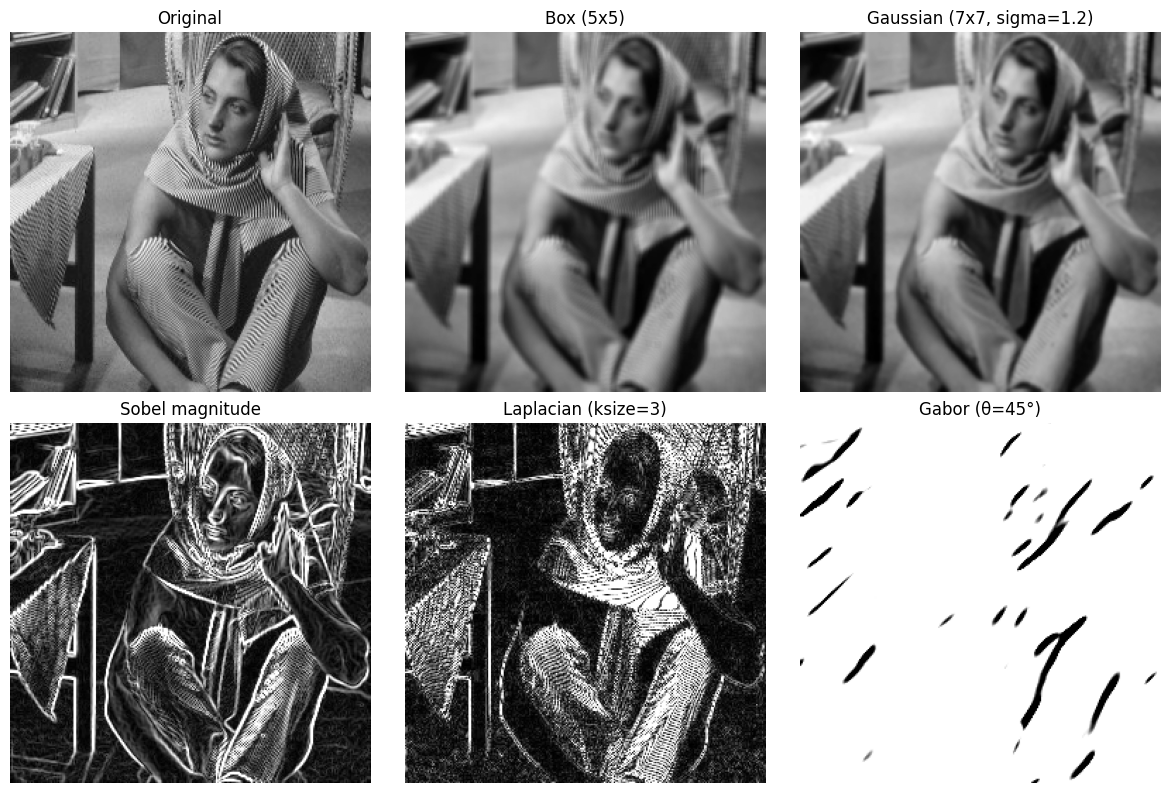

In [ ]:
# Box (moving-average) filter (predefined)
box = cv.boxFilter(img_gray, ddepth=-1, ksize=(5,5), normalize=True)

# Gaussian filter (create kernel with OpenCV, then apply)
g1d = cv.getGaussianKernel(ksize=7, sigma=1.2)
gauss_kernel = g1d @ g1d.T
gauss = cv.filter2D(img_gray, ddepth=-1, kernel=gauss_kernel)

# Sobel edges (predefined)
sobelx = cv.Sobel(img_gray, cv.CV_64F, 1, 0, ksize=3)
sobely = cv.Sobel(img_gray, cv.CV_64F, 0, 1, ksize=3)
sobel_mag = cv.convertScaleAbs(np.hypot(sobelx, sobely))

# Laplacian (predefined)
lap = cv.Laplacian(img_gray, cv.CV_64F, ksize=3)
lap = cv.convertScaleAbs(lap)

# Gabor filter (create kernel with OpenCV, then apply)
gabor_kernel = cv.getGaborKernel((21,21), sigma=4.0, theta=np.pi/4, lambd=10.0, gamma=0.5, psi=0)
gabor = cv.filter2D(img_gray, ddepth=-1, kernel=gabor_kernel)

# Show results
titles = ['Original', 'Box (5x5)', 'Gaussian (7x7, sigma=1.2)', 'Sobel magnitude', 'Laplacian (ksize=3)', 'Gabor (θ=45°)']
images = [img_gray, box, gauss, sobel_mag, lap, gabor]

plt.figure(figsize=(12,8))
for i, (t, im) in enumerate(zip(titles, images), 1):
    plt.subplot(2,3,i); plt.imshow(im, cmap='gray'); plt.title(t); plt.axis('off')
plt.tight_layout(); plt.show()


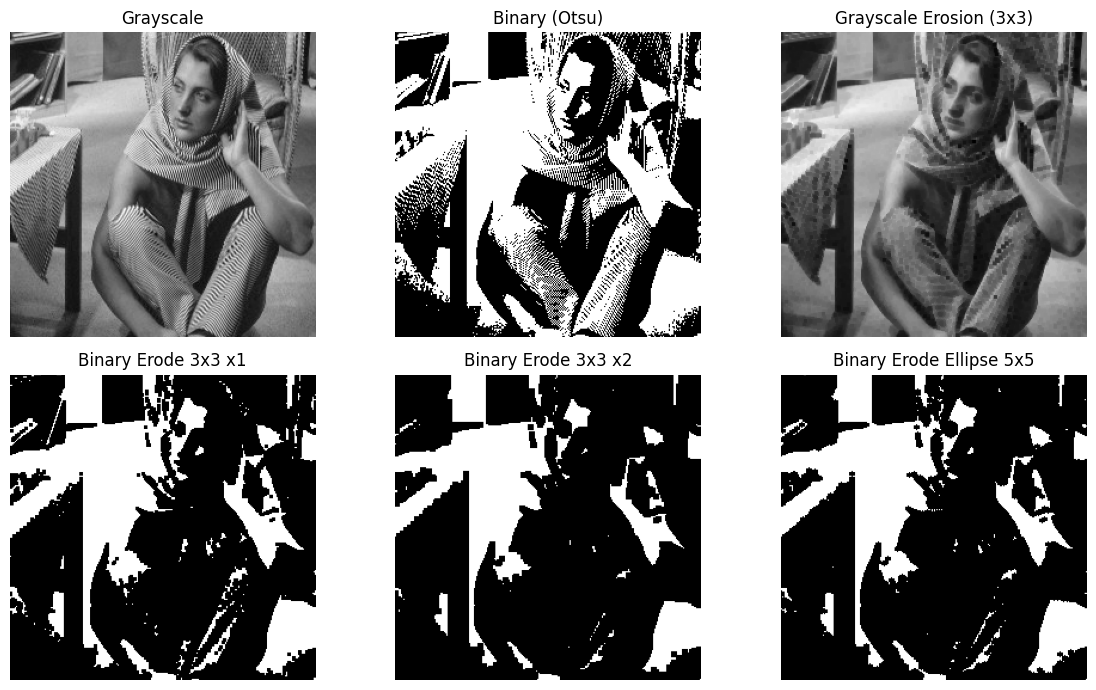

In [37]:
# Binary image for morphology (Otsu)
_, img_bin = cv.threshold(img_gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Structuring elements
kernel_sq3 = cv.getStructuringElement(cv.MORPH_RECT, (3, 3))
kernel_el5 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))

# Erosion on binary image
erosion_sq1 = cv.erode(img_bin, kernel_sq3, iterations=1)
erosion_sq2 = cv.erode(img_bin, kernel_sq3, iterations=2)
erosion_el1 = cv.erode(img_bin, kernel_el5, iterations=1)

# Optional: grayscale erosion (morphology on gray)
erosion_gray = cv.erode(img_gray, kernel_sq3, iterations=1)

# Show results
plt.figure(figsize=(12,7))
plt.subplot(2,3,1); plt.imshow(img_gray, cmap='gray'); plt.title('Grayscale'); plt.axis('off')
plt.subplot(2,3,2); plt.imshow(img_bin, cmap='gray'); plt.title('Binary (Otsu)'); plt.axis('off')
plt.subplot(2,3,3); plt.imshow(erosion_gray, cmap='gray'); plt.title('Grayscale Erosion (3x3)'); plt.axis('off')
plt.subplot(2,3,4); plt.imshow(erosion_sq1, cmap='gray'); plt.title('Binary Erode 3x3 x1'); plt.axis('off')
plt.subplot(2,3,5); plt.imshow(erosion_sq2, cmap='gray'); plt.title('Binary Erode 3x3 x2'); plt.axis('off')
plt.subplot(2,3,6); plt.imshow(erosion_el1, cmap='gray'); plt.title('Binary Erode Ellipse 5x5'); plt.axis('off')
plt.tight_layout(); plt.show()


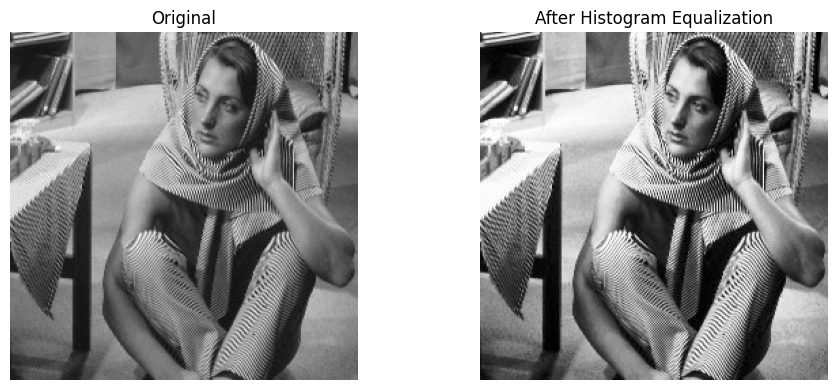

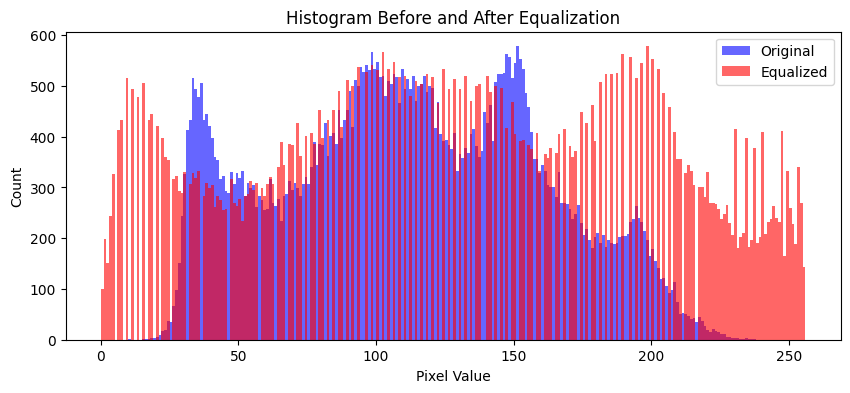

In [38]:
# Histogram equalization (contrast enhancement)
img_equalized = cv.equalizeHist(img_gray)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(img_gray, cmap='gray'); plt.title('Original'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(img_equalized, cmap='gray'); plt.title('After Histogram Equalization'); plt.axis('off')
plt.tight_layout(); plt.show()

plt.figure(figsize=(10,4))
plt.hist(img_gray.ravel(), bins=256, range=(0,256), color='blue', alpha=0.6, label='Original')
plt.hist(img_equalized.ravel(), bins=256, range=(0,256), color='red', alpha=0.6, label='Equalized')
plt.title('Histogram Before and After Equalization')
plt.xlabel('Pixel Value'); plt.ylabel('Count'); plt.legend()
plt.show()

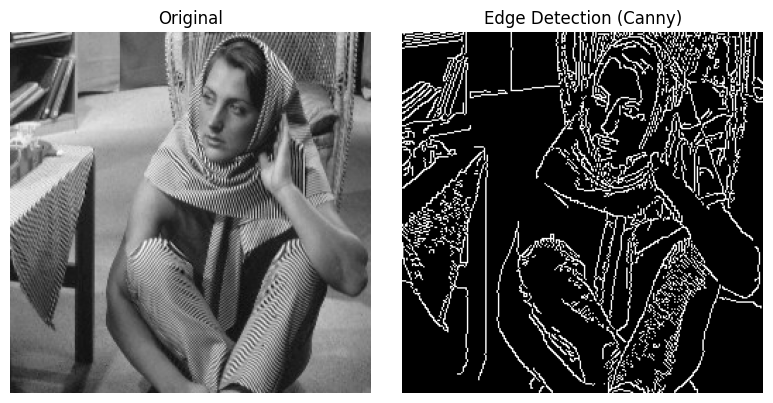

In [39]:
# Edge detection
edges = cv.Canny(img_gray, threshold1=100, threshold2=200)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1); plt.imshow(img_gray, cmap='gray'); plt.title('Original'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(edges, cmap='gray'); plt.title('Edge Detection (Canny)'); plt.axis('off')
plt.tight_layout(); plt.show()

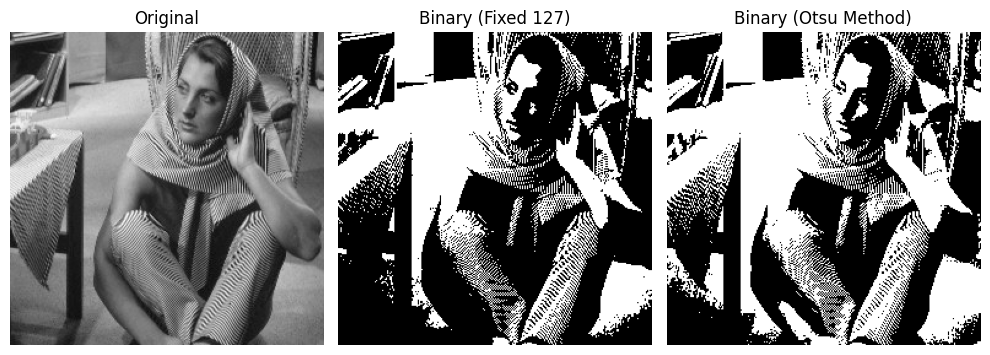

In [40]:
# Fixed threshold at value 127
_, img_binary_fixed = cv.threshold(img_gray, 127, 255, cv.THRESH_BINARY)

# Automatic threshold (Otsu's method)
_, img_binary_otsu = cv.threshold(img_gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Show the results
plt.figure(figsize=(10,4))
plt.subplot(1,3,1); plt.imshow(img_gray, cmap='gray'); plt.title('Original'); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(img_binary_fixed, cmap='gray'); plt.title('Binary (Fixed 127)'); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(img_binary_otsu, cmap='gray'); plt.title('Binary (Otsu Method)'); plt.axis('off')
plt.tight_layout()
plt.show()

## Task 2: Noise Filtering

Add Gaussian noise with:

     Zero mean

     Signal-to-noise ratio (SNR) of 20 dB

Apply the following filters to reduce noise:

    Moving average filter (box filter)
    
    Median filter

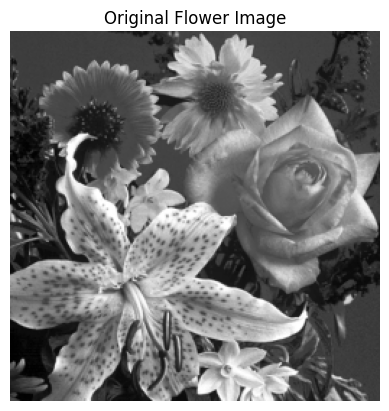

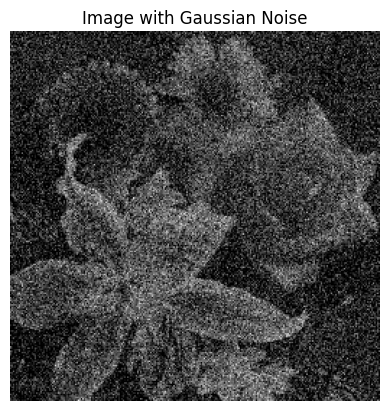

In [48]:
# Gaussian noise with Zero mean

# Load the flower image and add Gaussian noise
img_flower = loadmat("task2/flower.mat")
key_flower = [k for k in img_flower.keys() if not k.startswith("__")][0]
img_flower = np.squeeze(img_flower[key_flower])

# Display the original flower image
plt.figure()
plt.imshow(img_flower, cmap="gray")
plt.axis("off")
plt.title("Original Flower Image")
plt.show()

# Function adds Gaussian noise with Zero mean
def add_gaussian_noise(image, mean=0, sigma=None):
    gauss = np.random.normal(mean, sigma, image.shape).reshape(image.shape)
    noisy_image = image + gauss
    return np.clip(noisy_image, 0, 255).astype(image.dtype)

# Add Gaussian noise to the flower image
img_with_gauss_noise = add_gaussian_noise(np.array(img_flower), mean=0, sigma=0.3)
plt.figure()
plt.imshow(img_with_gauss_noise, cmap="gray")
plt.axis("off")
plt.title("Image with Gaussian Noise")
plt.show()

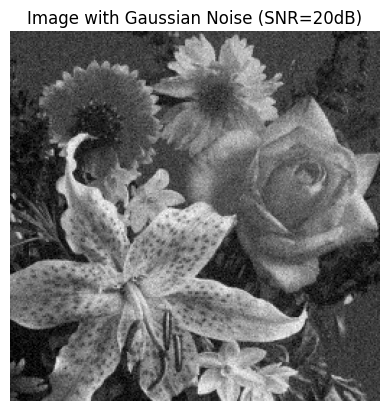

In [49]:
# Signal-to-noise ratio (SNR) of 20 dB

# Function adds Gaussian noise based on desired SNR
def add_gaussian_noise_snr(image, snr_db):
    # Calculate signal power and convert to dB
    signal_power = np.mean(image**2)
    signal_power_db = 10 * np.log10(signal_power)

    # Calculate noise power from SNR
    noise_power_db = signal_power_db - snr_db
    noise_power = 10 ** (noise_power_db / 10)

    # Generate Gaussian noise
    gauss = np.random.normal(0, np.sqrt(noise_power), image.shape).reshape(image.shape)
    noisy_image = image + gauss
    return np.clip(noisy_image, 0, 255).astype(image.dtype)

# Add Gaussian noise with SNR of 20 dB
img_with_snr_noise = add_gaussian_noise_snr(np.array(img_flower), snr_db=20)
plt.figure()
plt.imshow(img_with_snr_noise, cmap="gray")
plt.axis("off")
plt.title("Image with Gaussian Noise (SNR=20dB)")
plt.show()

Apply the following filters to reduce noise:

Moving average filter (box filter)

Median filter

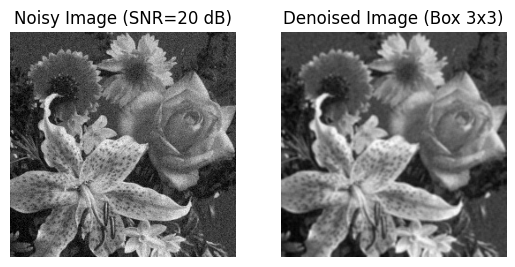

In [51]:
# Moving average (box) filter using OpenCV
img_denoised = cv.blur(img_with_snr_noise, (3, 3))  # 3x3 mean filter

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(img_with_snr_noise, cmap='gray')
plt.axis('off')
plt.title('Noisy Image (SNR=20 dB)')

plt.subplot(1, 2, 2)
plt.imshow(img_denoised, cmap='gray')
plt.axis('off')
plt.title('Denoised Image (Box 3x3)')

plt.show()

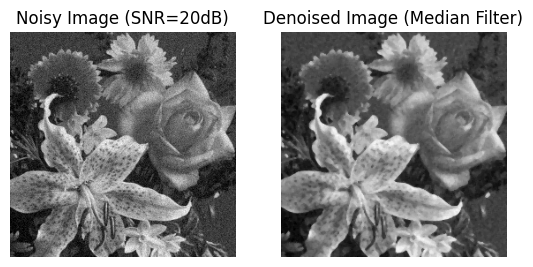

In [52]:
# Reduce noise by Median filter
def median_filter(image, filter_size=3):
    padded_image = np.pad(image, filter_size // 2, mode='edge')
    filtered_image = np.zeros_like(image)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_image[i:i+filter_size, j:j+filter_size]
            filtered_image[i, j] = np.median(region)
    
    return filtered_image

# Apply the median filter to the noisy image
img_median_denoised = median_filter(img_with_snr_noise, filter_size=3)

plt.figure()

plt.subplot(1, 2, 1)
plt.imshow(img_with_snr_noise, cmap="gray")
plt.axis("off")
plt.title("Noisy Image (SNR=20dB)")

plt.subplot(1, 2, 2)
plt.imshow(img_median_denoised, cmap="gray")
plt.axis("off")
plt.title("Denoised Image (Median Filter)")

plt.show()


Add salt-and-pepper noise affecting 20% of the pixels.

Apply both filters again:

Moving average

Median

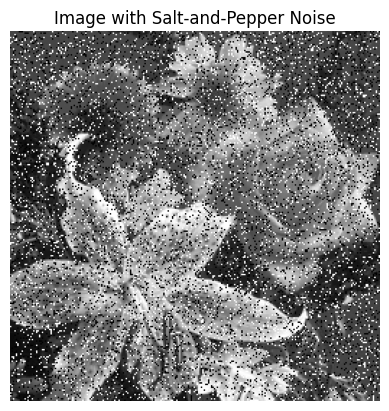

In [53]:
# Add Salt-and-Pepper Noise

def add_salt_and_pepper_noise(image, amount=0.2):
    noisy_image = np.copy(image)

    # Ensure image is float for manipulation
    if noisy_image.dtype != np.uint8:
        noisy_image = (255 * (noisy_image / noisy_image.max())).astype(np.uint8)

    # Calculate number of pixels
    height, width = image.shape
    num_total_pixels = height * width
    num_salt = int(np.ceil(amount * num_total_pixels * 0.5))
    num_pepper = int(np.ceil(amount * num_total_pixels * 0.5))

    # Generate random coordinates
    salt_coords = (
        np.random.randint(0, height, num_salt),
        np.random.randint(0, width, num_salt)
    )
    pepper_coords = (
        np.random.randint(0, height, num_pepper),
        np.random.randint(0, width, num_pepper)
    )

    # Set salt (white) pixels
    noisy_image[salt_coords[0], salt_coords[1]] = 255
    # Set pepper (black) pixels
    noisy_image[pepper_coords[0], pepper_coords[1]] = 0

    return noisy_image

# Add salt-and-pepper noise
img_with_sp_noise = add_salt_and_pepper_noise(img_flower, amount=0.2)

# Display
plt.figure()
plt.imshow(img_with_sp_noise, cmap="gray")
plt.axis("off")
plt.title("Image with Salt-and-Pepper Noise")
plt.show()


### Combine Both Noise Types

Add both Gaussian and salt-and-pepper noise to the image.

Restore the image using:

a) Moving average filter  (box filter)

b) Median filter

c) Sequential filtering (you choose the order of filters)

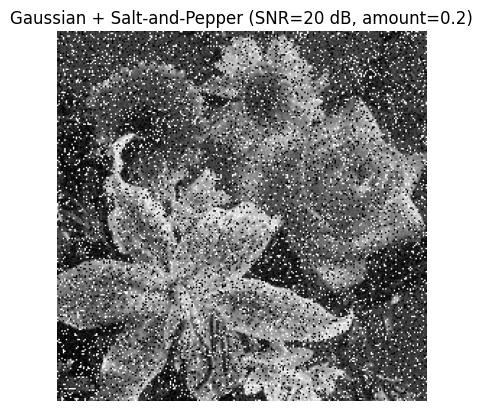

Combined-noise Image size: 65536


In [54]:
# Both Gaussian (SNR = 20 dB) and salt-and-pepper (20%) noise
img_both = add_salt_and_pepper_noise(img_with_snr_noise, amount=0.2)

# Display the combined noisy image
plt.figure()
plt.imshow(img_both, cmap="gray"); plt.axis("off")
plt.title("Gaussian + Salt-and-Pepper (SNR=20 dB, amount=0.2)")
plt.show()
print("Combined-noise Image size:", img_both.size)


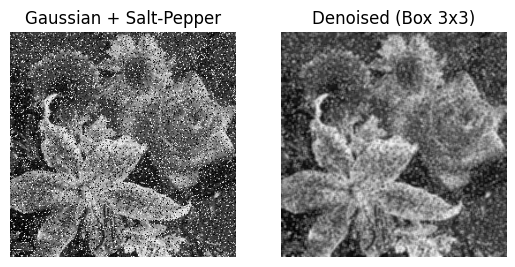

In [56]:
# Restore the image using Moving average filter (box filter)
img_sp_denoised = cv.blur(img_both, (3, 3))

# Display the noisy and denoised images
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(img_both, cmap='gray')
plt.axis('off')
plt.title('Gaussian + Salt-Pepper')

plt.subplot(1, 2, 2)
plt.imshow(img_sp_denoised, cmap='gray')
plt.axis('off')
plt.title('Denoised (Box 3x3)')

plt.show()

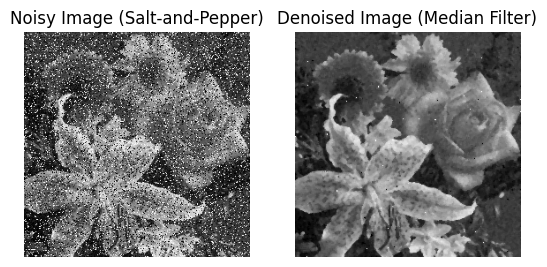

In [57]:
# # Restore the image using Median filter
img_sp_median_denoised = median_filter(img_both, filter_size=3)

# Display the noisy and denoised images
plt.figure()

plt.subplot(1, 2, 1)
plt.imshow(img_both, cmap="gray")
plt.axis("off")
plt.title("Noisy Image (Salt-and-Pepper)")

plt.subplot(1, 2, 2)
plt.imshow(img_sp_median_denoised, cmap="gray")
plt.axis("off")
plt.title("Denoised Image (Median Filter)")

plt.show()

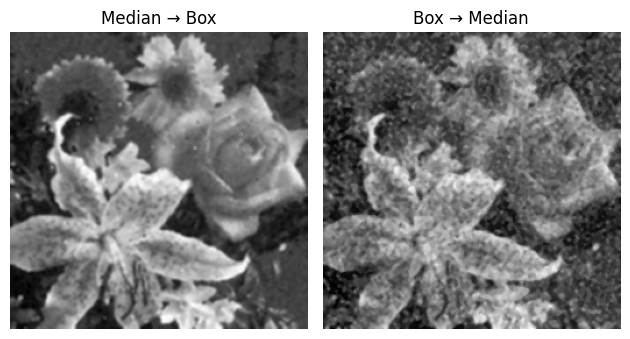

In [59]:
# Sequential filtering examples

# 1) Median filter followed by Box filter
img_med_then_box = cv.medianBlur(img_both, 3)
img_med_then_box = cv.blur(img_med_then_box, (3, 3))

# 2) Box filter followed by Median filter
img_box_then_med = cv.blur(img_both, (3, 3))
img_box_then_med = cv.medianBlur(img_box_then_med, 3)

# Display results
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(img_med_then_box, cmap='gray')
plt.axis('off')
plt.title('Median → Box')

plt.subplot(1, 2, 2)
plt.imshow(img_box_then_med, cmap='gray')
plt.axis('off')
plt.title('Box → Median')

plt.tight_layout()
plt.show()

Trade-off: median preserves sharpness but may lose subtle details; moving average smooths more uniformly but at the cost of edge clarity.

## Task 3: Edge Detection

Objective: Detect edges in an image using different kernels and apply thresholding to create binary edge maps.

Resources: clock image

Instructions:

Apply Edge Detection Kernels

Use three different edge detection kernels (e.g., Sobel, Prewitt, Roberts).

Generate edge maps for each method.

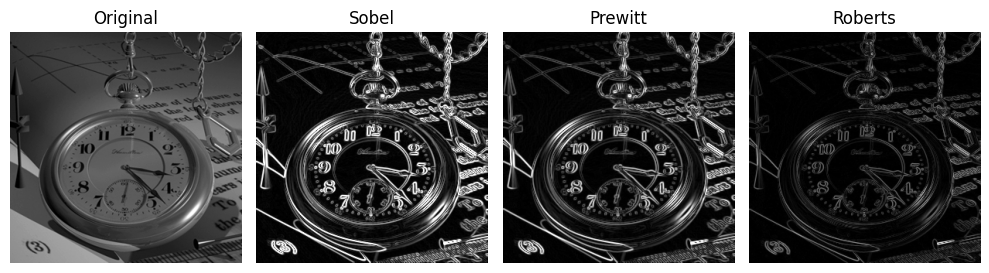

In [64]:
# --- Load grayscale image from .mat ---
mat = loadmat('task3/clock.mat')
key = [k for k in mat.keys() if not k.startswith('__')][0]
img = np.squeeze(mat[key]).astype(np.float32)
if img.max() <= 1:
    img = (img * 255).astype(np.uint8)
else:
    img = img.astype(np.uint8)

# --- Compute edge maps (Sobel, Prewitt, Roberts) ---

# Sobel
sx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)
sy = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)
sobel = cv.magnitude(sx, sy)
sobel = cv.convertScaleAbs(sobel)

# Prewitt
Kx = np.array([[1, 0, -1],
               [1, 0, -1],
               [1, 0, -1]], np.float32)
Ky = np.array([[1, 1, 1],
               [0, 0, 0],
               [-1, -1, -1]], np.float32)
px = cv.filter2D(img, cv.CV_32F, Kx)
py = cv.filter2D(img, cv.CV_32F, Ky)
prewitt = cv.magnitude(px, py)
prewitt = cv.convertScaleAbs(prewitt)

# Roberts
Kx = np.array([[1, 0],
               [0, -1]], np.float32)
Ky = np.array([[0, 1],
               [-1, 0]], np.float32)
rx = cv.filter2D(img, cv.CV_32F, Kx)
ry = cv.filter2D(img, cv.CV_32F, Ky)
roberts = cv.magnitude(rx, ry)
roberts = cv.convertScaleAbs(roberts)

# --- Display original and edge maps ---
titles = ['Original', 'Sobel', 'Prewitt', 'Roberts']
images = [img, sobel, prewitt, roberts]

plt.figure(figsize=(10, 6))
for i, (title, im) in enumerate(zip(titles, images)):
    plt.subplot(1, 4, i + 1)
    plt.imshow(im, cmap='gray')
    plt.title(title)
    plt.axis('off')
plt.tight_layout()
plt.show()

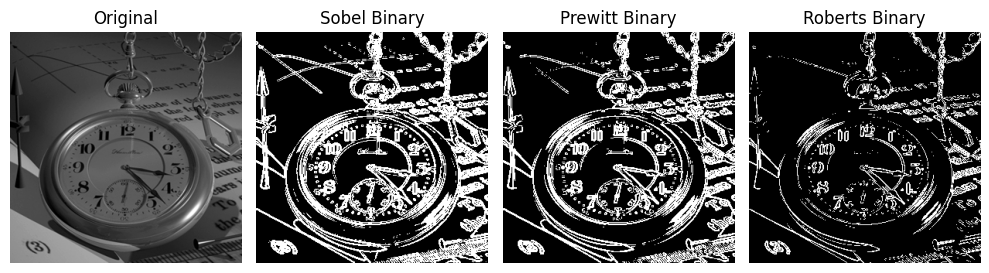

In [65]:
# Apply global thresholding to convert edge maps to binary 

_, sobel_bin = cv.threshold(sobel, 50, 255, cv.THRESH_BINARY)
_, prewitt_bin = cv.threshold(prewitt, 50, 255, cv.THRESH_BINARY)
_, roberts_bin = cv.threshold(roberts, 30, 255, cv.THRESH_BINARY)

# Display original and binary edge maps 
titles = ['Original', 'Sobel Binary', 'Prewitt Binary', 'Roberts Binary']
images = [img, sobel_bin, prewitt_bin, roberts_bin]

plt.figure(figsize=(10, 6))
for i, (title, im) in enumerate(zip(titles, images)):
    plt.subplot(1, 4, i + 1)
    plt.imshow(im, cmap='gray')
    plt.title(title)
    plt.axis('off')
plt.tight_layout()
plt.show()


## Task 4: Template Matching

Locate a specific template (e.g., a stop sign) within a larger image using normalized cross-correlation.

Resources: Original image and template (e.g., stop sign)

Instructions:

Perform Template Matching  (include in the report PDF)

Use normalized cross-correlation to find the location of the template within the original image.

Visualize the match.

Original Image size: (790, 520)
Template size: (1024, 1024)


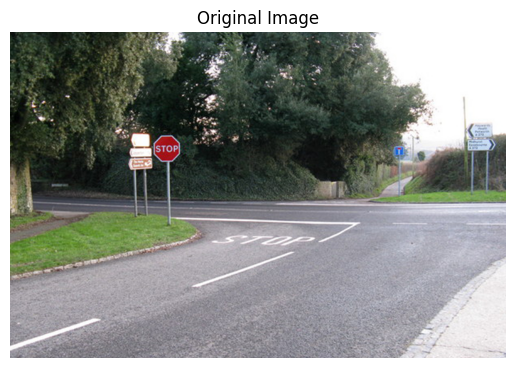

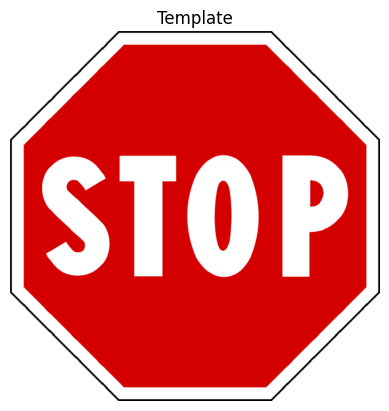

In [73]:
# Load the original image and template and convert to grayscale
img_street = Image.open("task4/original_image.jpg")

# Load and convert the template to grayscale
template = Image.open("task4/template.png")

# Show sizes of the original image and template
print("Original Image size:", img_street.size)
print("Template size:", template.size)

# Visualize the original image and template
plt.figure()
plt.imshow(img_street)
plt.axis("off")
plt.title("Original Image")
plt.show()

plt.figure()
plt.imshow(template)
plt.axis("off")
plt.title("Template")
plt.show()


Image: (520, 790) | candidate template widths: [39, 48, 56, 64, 73]


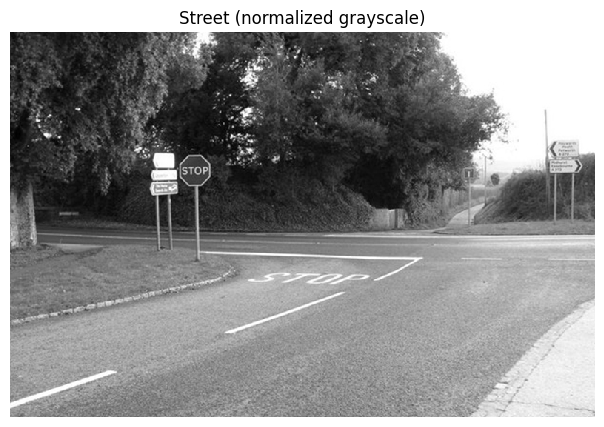

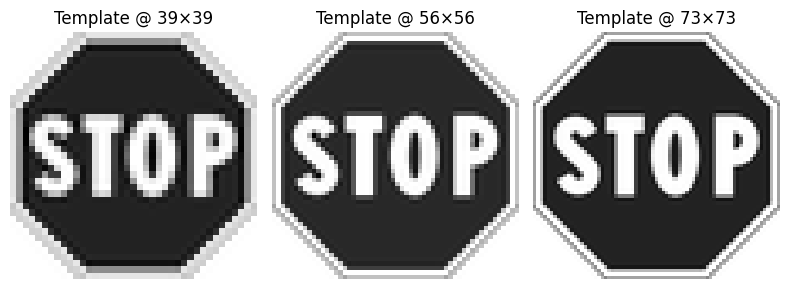

In [74]:
# Load as grayscale
img_street = Image.open("task4/original_image.jpg").convert("L")
template   = Image.open("task4/template.png").convert("L")

I = np.asarray(img_street, dtype=np.float32)
T0 = np.asarray(template,   dtype=np.float32)

# Candidate widths around 56 px (±30%)
base_w = 56
cand_widths = [int(round(base_w*s)) for s in (0.7, 0.85, 1.0, 1.15, 1.3)]
cand_widths = [w for w in cand_widths if 8 <= w < I.shape[1]]

# Choose resampling mode
try:
    RES = Image.Resampling.LANCZOS
except AttributeError:
    RES = Image.LANCZOS

def resize_np(arr, w):
    """Resize numpy grayscale array to target width w using Lanczos."""
    h = int(round(arr.shape[0] * (w / arr.shape[1])))
    return np.asarray(
        Image.fromarray(arr.astype(np.uint8)).resize((w, h), RES),
        dtype=np.float32
    )

# Build scaled template candidates
templates = [resize_np(T0, w) for w in cand_widths]

# Normalize street image to z-score 
I = (I - I.mean()) / (I.std() + 1e-6)

print("Image:", I.shape, "| candidate template widths:", [T.shape[1] for T in templates])


# 1) Show the normalized street image
plt.figure(figsize=(8, 5))
plt.imshow(I, cmap="gray", interpolation="nearest")
plt.title("Street (normalized grayscale)")
plt.axis("off")
plt.show()

# 2) Show a few candidate templates (min, mid, max size)
pick = [0, len(templates)//2, -1] if templates else []
fig, axs = plt.subplots(1, len(pick), figsize=(8, 3))
for i, idx in enumerate(pick):
    axs[i].imshow(templates[idx], cmap="gray", interpolation="nearest")
    axs[i].set_title(f"Template @ {templates[idx].shape[1]}×{templates[idx].shape[0]}")
    axs[i].axis("off")
plt.tight_layout()
plt.show()


/var/folders/v_/7tg64_px0zlgb5gnl2_9prnw0000gn/T/ipykernel_81084/2361848542.py:6: DeprecationWarning: `axes` should not be `None` if `s` is not `None` (Deprecated in NumPy 2.0). In a future version of NumPy, this will raise an error and `s[i]` will correspond to the size along the transformed axis specified by `axes[i]`. To retain current behaviour, pass a sequence [0, ..., k-1] to `axes` for an array of dimension k.
  FA = np.fft.rfftn(A, s=(padH, padW))
/var/folders/v_/7tg64_px0zlgb5gnl2_9prnw0000gn/T/ipykernel_81084/2361848542.py:7: DeprecationWarning: `axes` should not be `None` if `s` is not `None` (Deprecated in NumPy 2.0). In a future version of NumPy, this will raise an error and `s[i]` will correspond to the size along the transformed axis specified by `axes[i]`. To retain current behaviour, pass a sequence [0, ..., k-1] to `axes` for an array of dimension k.
  FK = np.fft.rfftn(KR, s=(padH, padW))
/var/folders/v_/7tg64_px0zlgb5gnl2_9prnw0000gn/T/ipykernel_81084/2361848542.py:

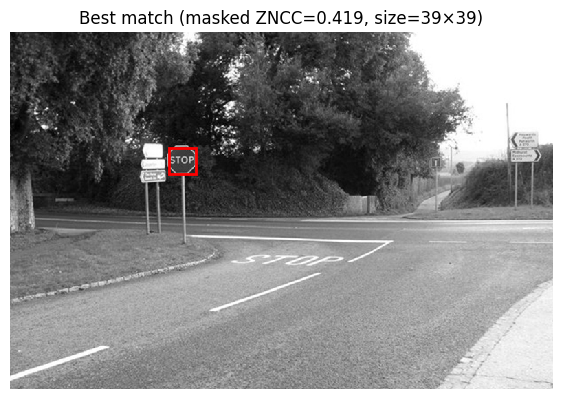

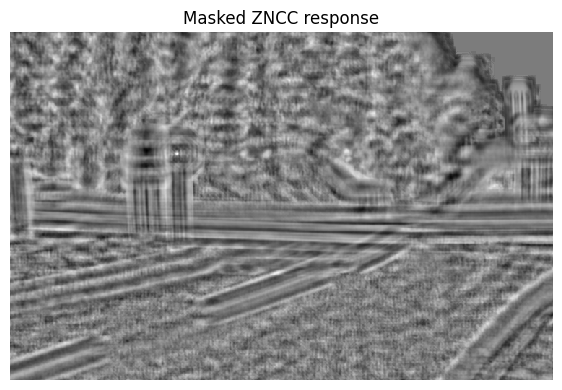

In [72]:
# Masked ZNCC template matching functions
def conv2_valid_fft(A, K):
    H, W = A.shape; h, w = K.shape
    padH, padW = H + h - 1, W + w - 1
    KR = K[::-1, ::-1]
    FA = np.fft.rfftn(A, s=(padH, padW))
    FK = np.fft.rfftn(KR, s=(padH, padW))
    full = np.fft.irfftn(FA * FK, s=(padH, padW))
    return full[h-1:H, w-1:W]

# Masked ZNCC function
def masked_zncc(I, T, M, eps=1e-9, std_floor=1e-6):
    M = M.astype(np.float64)
    S_M = M.sum() + eps
    mu_T = (T*M).sum() / S_M
    Tz   = (T - mu_T) * M
    sigma_T = np.sqrt(np.maximum((Tz*Tz).sum(), 0.0)) + eps

    S_IM  = conv2_valid_fft(I, M)
    S_I2M = conv2_valid_fft(I*I, M)
    S_ITM = conv2_valid_fft(I, T*M)

    num   = S_ITM - S_IM * mu_T
    var_I = np.maximum(S_I2M - (S_IM*S_IM)/S_M, 0.0)
    sigma_I = np.sqrt(var_I) + eps

    R = num / (sigma_T * sigma_I)
    R[sigma_I < std_floor] = -1.0
    return np.clip(R, -1, 1)

# Build mask function
def build_mask(T):
    # keep dark fill and bright rim/letters; drop mid-gray background
    T = T.astype(np.float32)
    T01 = (T - T.min()) / (np.ptp(T) + 1e-6)
    M = ((T01 < 0.6) | (T01 > 0.85)).astype(np.float64)
    if min(T.shape) > 6:  # trim 1px border to avoid ringing
        M[:1,:]=M[-1:,:]=M[:,:1]=M[:,-1:]=0
    return M

# multi-scale masked ZNCC over the templates from Cell 1
best = None  # (score, x, y, tw, th, R)
for T in templates:
    M = build_mask(T)
    R = masked_zncc(I, T, M)
    y, x = np.unravel_index(np.argmax(R), R.shape)
    s = float(R[y, x])
    if (best is None) or (s > best[0]):
        best = (s, int(x), int(y), T.shape[1], T.shape[0], R)

score, x, y, tw, th, Rbest = best

# overlay detection
plt.figure(figsize=(7, 5))
plt.imshow(I, cmap="gray", interpolation="nearest")
plt.gca().add_patch(patches.Rectangle((x, y), tw, th, fill=False, edgecolor="red", linewidth=2))
plt.axis("off")
plt.title(f"Best match (masked ZNCC={score:.3f}, size={tw}×{th})")
plt.show()

# response map
plt.figure(figsize=(7, 5))
plt.imshow(Rbest, cmap="gray", interpolation="nearest")
plt.axis("off")
plt.title("Masked ZNCC response")
plt.show()


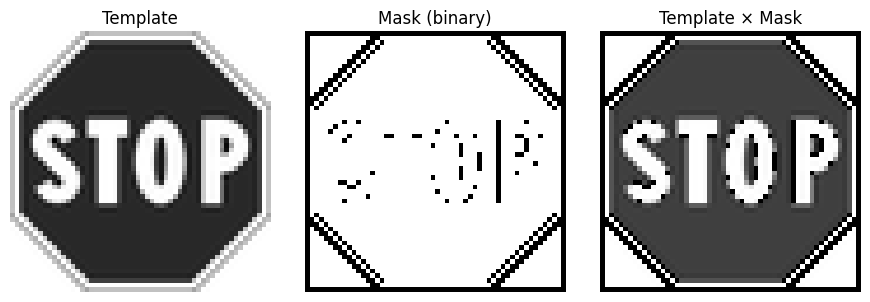

In [103]:
import matplotlib.pyplot as plt
import numpy as np

# pick one template to inspect (e.g., middle-sized one)
T = templates[len(templates)//2]

def build_mask(T):
    T = T.astype(np.float32)
    T01 = (T - T.min()) / (np.ptp(T) + 1e-6)
    M = ((T01 < 0.6) | (T01 > 0.85)).astype(np.float64)
    if min(T.shape) > 6:
        M[:1,:]=M[-1:,:]=M[:,:1]=M[:,-1:]=0
    return M

M = build_mask(T)

# masked template (visible pixels only)
masked_T = T * M

# show visualization
fig, axs = plt.subplots(1, 3, figsize=(9, 3))
axs[0].imshow(T, cmap="gray")
axs[0].set_title("Template")
axs[0].axis("off")

axs[1].imshow(M, cmap="gray")
axs[1].set_title("Mask (binary)")
axs[1].axis("off")

axs[2].imshow(masked_T, cmap="gray")
axs[2].set_title("Template × Mask")
axs[2].axis("off")

plt.tight_layout()
plt.show()
